In [145]:
import pandas as pd
import numpy as np
import plotly.express as px

In [146]:
df = pd.read_csv("Data/properati.csv", sep=",")

In [147]:
df.shape

(121220, 26)

In [148]:
df["state_name"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

# Tratamiento por provincia

In [149]:
provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')

In [150]:
provincias.shape

(27773, 26)

In [35]:
provincias.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

### Descubrimos cuantos datos faltantes hay en este subset 

In [151]:
len(provincias) - len(provincias['price_usd_per_m2'].dropna()) ## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      

18152

In [152]:
provincias['nulos'] = pd.isnull(provincias['price_usd_per_m2'])


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
provincias

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,nulos
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...,True
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...,True
10,10,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,...,46.235139,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boy_venta_casa_c...,"Hermosa casa sin terminar de 3 dormitorios, ba...",Casa sin terminar en Falda de Cañete. ...,https://thumbs4.properati.com/3/mQkhIxXpTTbMSc...,False
20,20,sell,house,Villa Giardino,|Argentina|Córdoba|Villa Giardino|,Argentina,Córdoba,3832729.0,"-31.0529852,-64.4991278",-31.052985,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bqb_venta_casa_v...,"Consta de: Comedor-cocina, cuatro dormitorios ...","Casa con excelente ubicaciòn, calle asfaltada,...",https://thumbs4.properati.com/1/9Z3PZS2TK7olUo...,True
32,32,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4053736,-64.1562667",-31.405374,...,616.920400,11000.0,NaN,3.0,NaN,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,https://thumbs4.properati.com/0/VUXj3pHJP7wl8p...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121202,121202,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,1625.348077,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj71_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,False
121203,121203,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj72_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,False
121204,121204,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj73_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,False
121205,121205,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj74_venta_depart...,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,False


In [154]:
provincias['counter'] = 1

provincias[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state_name,price_per_m2,price_usd_per_m2,nulos
5,Entre Ríos,NaN,NaN,True
9,Santa Fe,NaN,NaN,True
10,Córdoba,NaN,46.235139,False
20,Córdoba,NaN,NaN,True
32,Córdoba,11000.0,616.920400,False
...,...,...,...,...
121202,Córdoba,NaN,1625.348077,False
121203,Córdoba,NaN,1684.753600,False
121204,Córdoba,NaN,1684.753600,False
121205,Córdoba,NaN,1690.362000,False


In [61]:
provincias.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'nulos', 'counter'],
      dtype='object')

In [155]:
provincias_group1 = provincias.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()

In [156]:
provincias_group1['nulos'] = provincias_group1['nulos'].astype(str)

In [157]:
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('False','Hay datos')
provincias_group1['nulos'] = provincias_group1.nulos.str.replace('True','No hay datos')

# # Graficamente la proporción entre nulos y no nulos

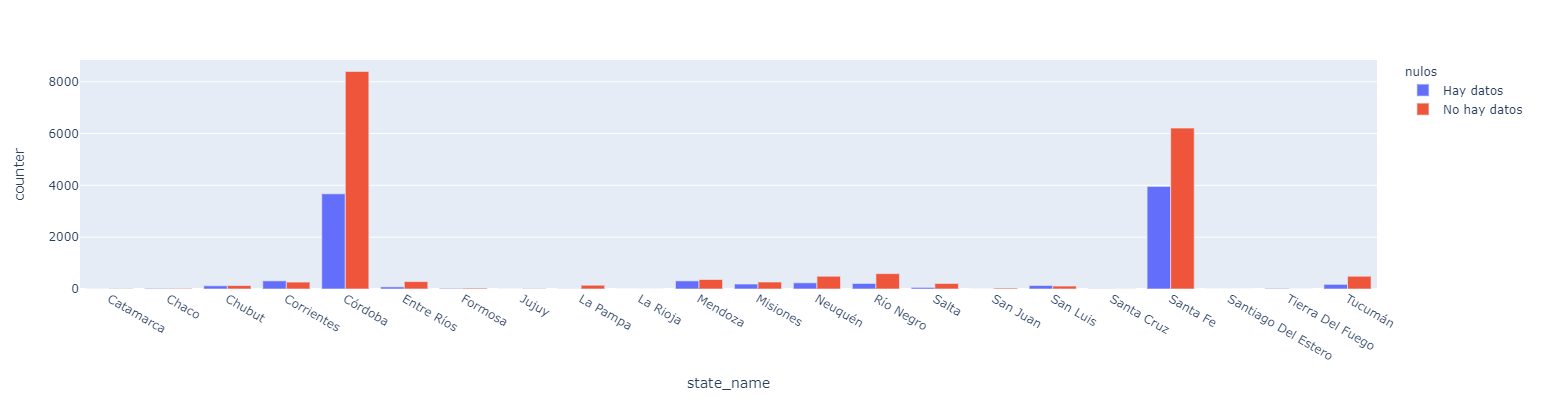

In [158]:
fig = px.bar(provincias_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400)
fig.show()

## Analizamos ahora la variabilidad en el precio 

In [159]:
provincias_group2 = provincias.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [160]:
provincias_group2.reset_index(inplace=True)

In [161]:
provincias_group2['rango'] = provincias_group2['max'] - provincias_group2['min']

In [162]:
provincias_group2

,state_name,min,max,rango
0,Catamarca,145.454545,1666.666667,1521.212121
1,Chaco,163.033942,2386.363636,2223.329695
2,Chubut,13.500000,14540.550661,14527.050661
3,Corrientes,83.682008,3500.000000,3416.317992
4,Córdoba,1.184571,30000.000000,29998.815429
5,Entre Ríos,5.608367,24038.461538,24032.853171
6,Formosa,1490.540000,1514.259219,23.719219
7,Jujuy,210.313787,1682.510200,1472.196412
8,La Pampa,392.585700,1402.091875,1009.506175
9,La Rioja,243.029233,243.029233,0.000000


# Tratamientos en Baires

In [163]:
baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
caba = df.query(' state_name == "Capital Federal"')
bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
bsas_interior = df.query(' state_name == "Buenos Aires Interior"')


In [53]:
baires.shape

(93447, 26)

In [54]:
data.apply(lambda x: x.isnull().sum(), axis=0)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [164]:
len(baires) - len(baires['price_usd_per_m2'].dropna()) ## Este dato indica cuantos son los valores faltantes en el dataframe                                                                                                      

34451

In [165]:
baires['nulos'] = pd.isnull(baires['price_usd_per_m2'])
caba['nulos'] = pd.isnull(caba['price_usd_per_m2'])
bsas_sur['nulos'] = pd.isnull(bsas_sur['price_usd_per_m2'])
bsas_norte['nulos'] = pd.isnull(bsas_norte['price_usd_per_m2'])
bsas_costa['nulos'] = pd.isnull(bsas_costa['price_usd_per_m2'])
bsas_oeste['nulos'] = pd.isnull(bsas_oeste['price_usd_per_m2'])
bsas_interior['nulos'] = pd.isnull(bsas_interior['price_usd_per_m2'])



C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [72]:
baires

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,counter,nulos
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,False
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,True
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,False
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,1,True
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,1,False
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,1,False
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,1,False
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,1,False


In [166]:
baires['counter'] = 1
caba['counter'] = 1
bsas_costa['counter'] = 1
bsas_norte['counter'] = 1
bsas_oeste['counter'] = 1
bsas_sur['counter'] = 1
bsas_interior['counter'] = 1



baires[['state_name','price_per_m2','price_usd_per_m2','nulos']]

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,state_name,price_per_m2,price_usd_per_m2,nulos
0,Capital Federal,1550.000000,1127.272727,False
1,Bs.As. G.B.A. Zona Sur,NaN,NaN,True
2,Capital Federal,1309.090909,1309.090909,False
3,Capital Federal,NaN,NaN,True
4,Buenos Aires Costa Atlántica,1828.571429,1828.571429,False
...,...,...,...,...
121215,Capital Federal,9354.838710,7699.115044,False
121216,Bs.As. G.B.A. Zona Norte,1383.333333,1383.333333,False
121217,Capital Federal,3371.794872,2858.695652,False
121218,Buenos Aires Costa Atlántica,1997.916667,1997.916667,False


In [167]:
baires.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'nulos', 'counter'],
      dtype='object')

In [168]:
baires_group1 = baires.groupby(by=['state_name','nulos'],as_index=False)['counter'].sum()

In [169]:
baires_group1['nulos'] = baires_group1['nulos'].astype(str)

In [170]:
baires_group1['nulos'] = baires_group1.nulos.str.replace('False','Hay datos')
baires_group1['nulos'] = baires_group1.nulos.str.replace('True','No hay datos')

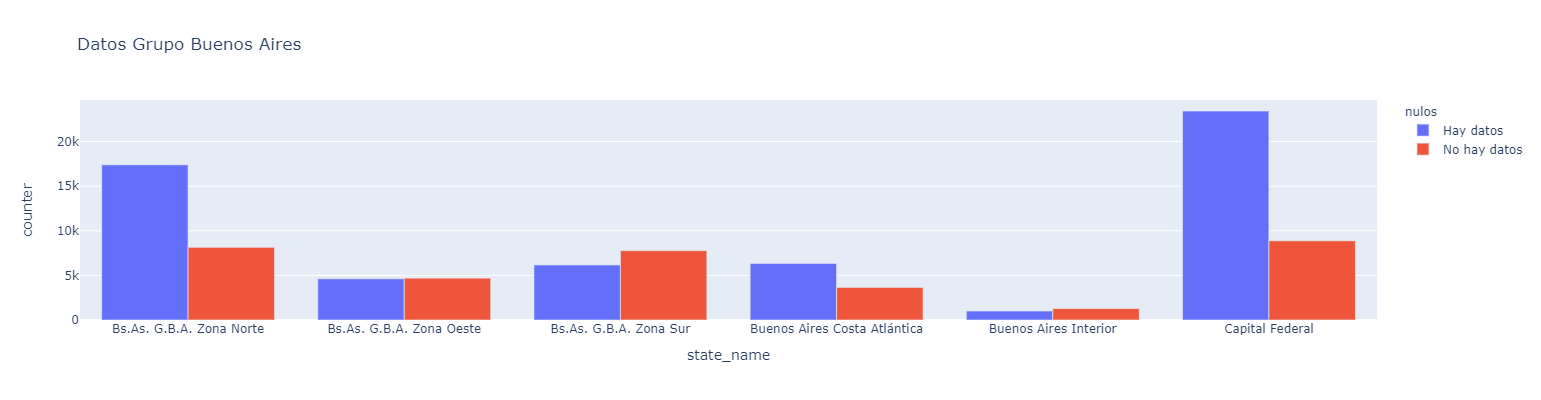

In [171]:
fig = px.bar(baires_group1, x="state_name", y="counter",
             color='nulos', barmode='group',
             height=400, title = "Datos Grupo Buenos Aires")
fig.show()

In [172]:
baires_group2 = baires.groupby(by=['state_name'],as_index=False)['price_usd_per_m2'].agg(['min', 'max'])

In [173]:
baires_group2.reset_index(inplace=True)

In [174]:
baires_group2['rango'] = baires_group2['max'] - baires_group2['min']

In [175]:
baires_group2

,state_name,min,max,rango
0,Bs.As. G.B.A. Zona Norte,4.166667,48296.222222,48292.055556
1,Bs.As. G.B.A. Zona Oeste,7.000000,80000.000000,79993.000000
2,Bs.As. G.B.A. Zona Sur,19.314341,23140.764706,23121.450365
3,Buenos Aires Costa Atlántica,1.000000,21897.058824,21896.058824
4,Buenos Aires Interior,2.072029,4166.666667,4164.594638
5,Capital Federal,13.797467,206333.333333,206319.535867


In [177]:
caba_barrios_grupo = caba.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
caba_barrios_grupo['nulos'] = caba_barrios_grupo['nulos'].astype(str)
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('False','Hay datos')
caba_barrios_grupo['nulos'] = caba_barrios_grupo.nulos.str.replace('True','No hay datos')

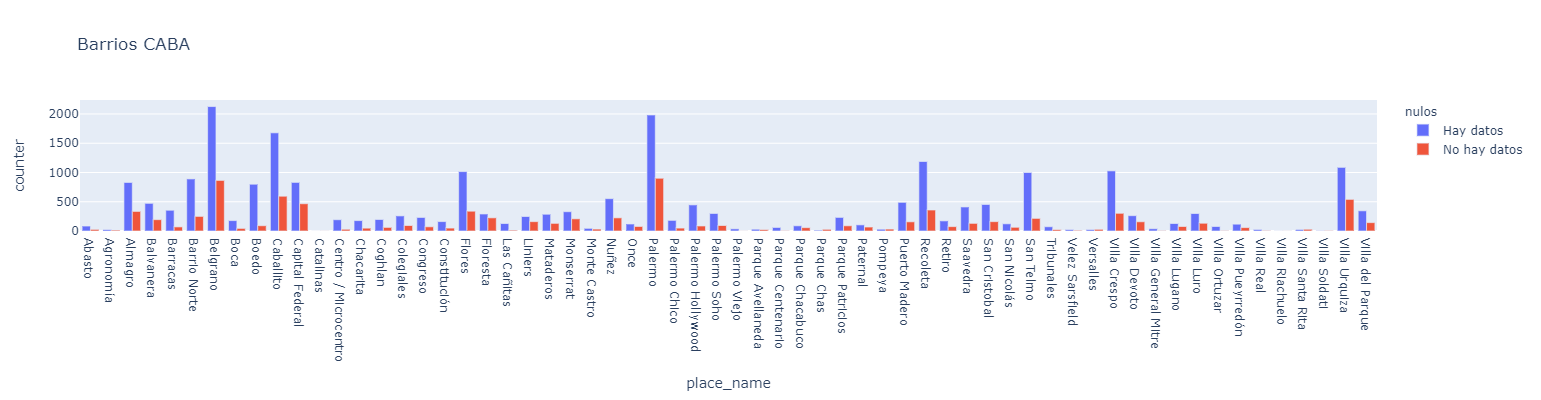

In [178]:
fig = px.bar(caba_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title="Barrios CABA")
fig.show()

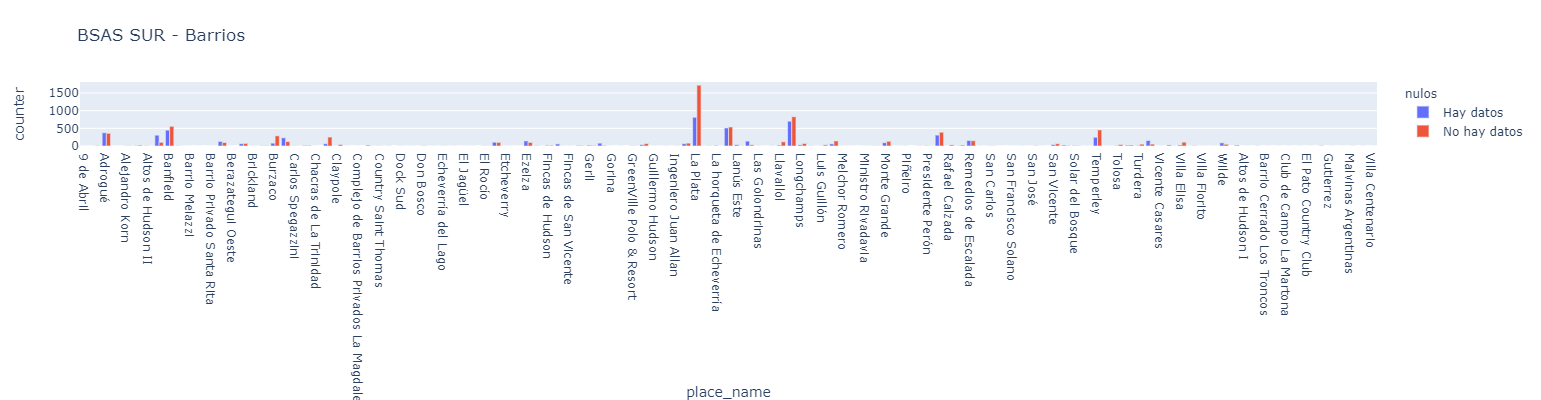

In [179]:
bsas_sur_barrios_group = bsas_sur.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group['nulos'].astype(str)
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('False','Hay datos')
bsas_sur_barrios_group['nulos'] = bsas_sur_barrios_group.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_sur_barrios_group, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" BSAS SUR - Barrios")
fig.show()

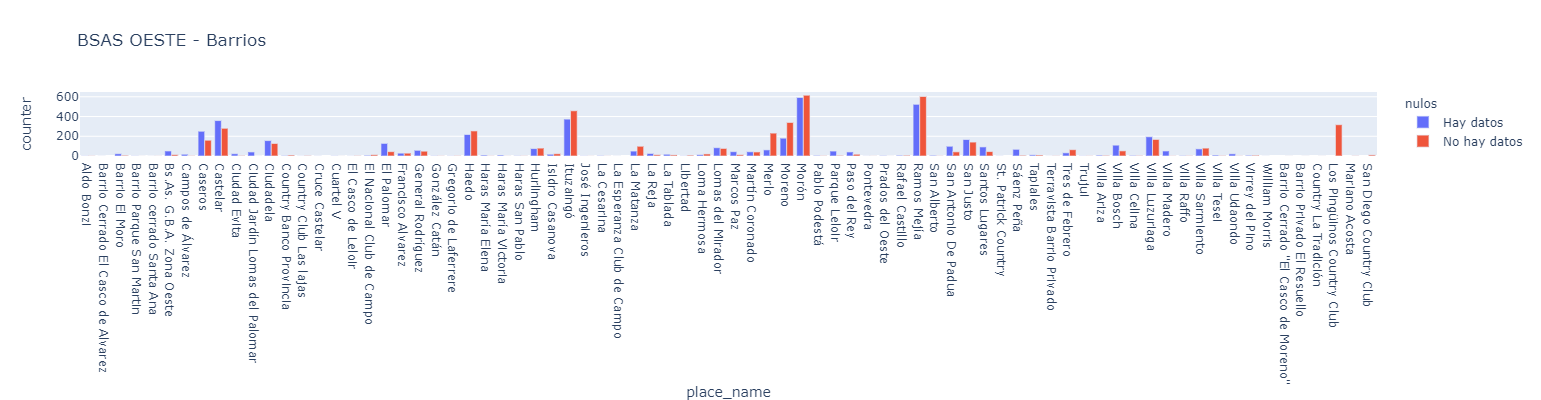

In [180]:
bsas_oeste_barrios_grupo = bsas_oeste.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo['nulos'].astype(str)
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_oeste_barrios_grupo['nulos'] = bsas_oeste_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_oeste_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" BSAS OESTE - Barrios")
fig.show()

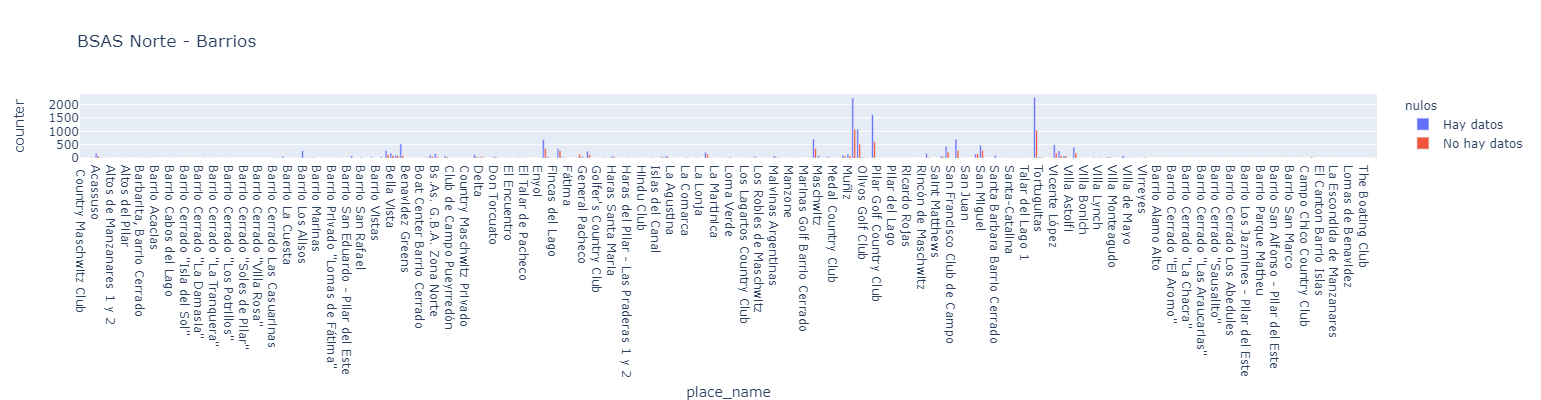

In [181]:
bsas_norte_barrios_grupo = bsas_norte.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo['nulos'].astype(str)
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_norte_barrios_grupo['nulos'] = bsas_norte_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_norte_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" BSAS Norte - Barrios")
fig.show()

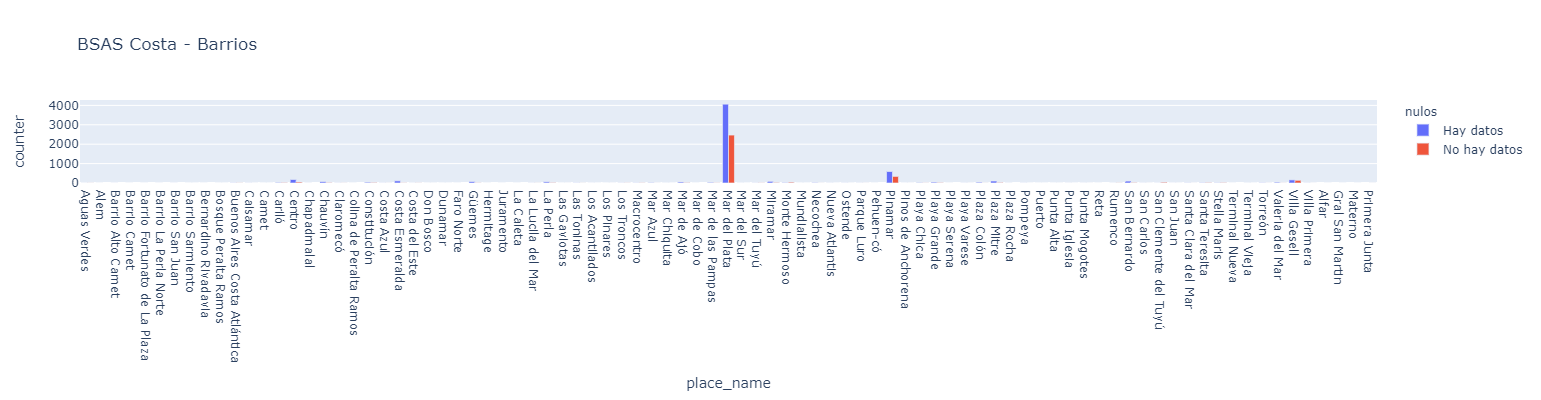

In [182]:
bsas_costa_barrios_grupo = bsas_costa.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo['nulos'].astype(str)
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_costa_barrios_grupo['nulos'] = bsas_costa_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_costa_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" BSAS Costa - Barrios")
fig.show()

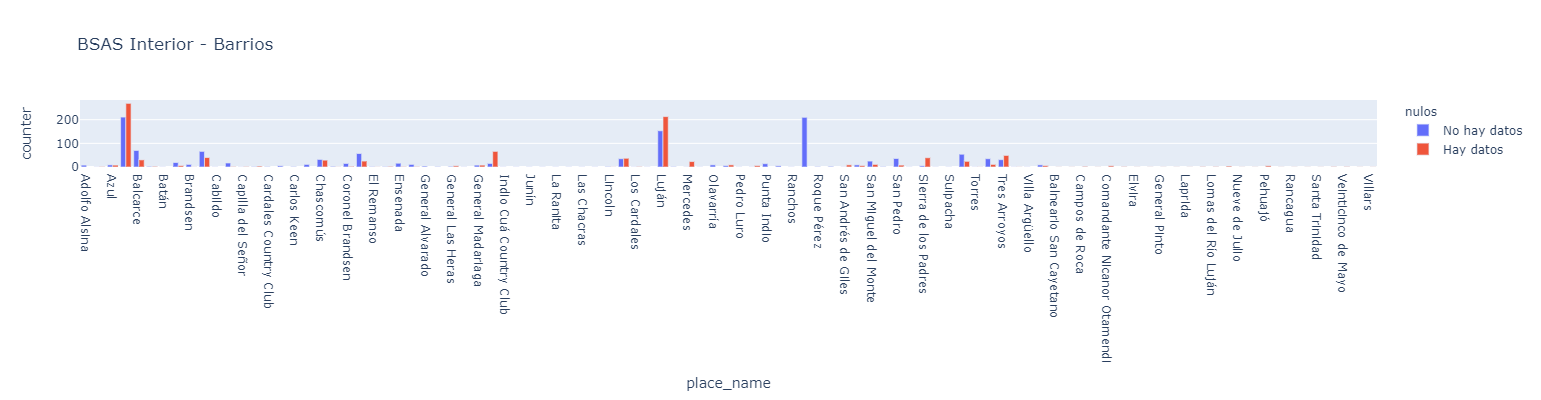

In [183]:
bsas_interior_barrios_grupo = bsas_interior.groupby(by=['state_name','place_name','nulos'],as_index=False)['counter'].sum()
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo['nulos'].astype(str)
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('False','Hay datos')
bsas_interior_barrios_grupo['nulos'] = bsas_interior_barrios_grupo.nulos.str.replace('True','No hay datos')
fig = px.bar(bsas_interior_barrios_grupo, x="place_name", y="counter",
             color='nulos', barmode='group',
             height=400, title=" BSAS Interior - Barrios")
fig.show()

In [184]:
#Desidir si debemos dropear o estimar con algun indicador estadistico los valores faltantes
#Seleccion de variables que consideramos importantes para la regresión
#Limpiar esas variables. 
#Ver si agregamos los boxplot por cada muestra o grupo, grafico comparativo de datos iniciales y datos analizados



In [188]:
print(caba['price_usd_per_m2'].describe())
print(bsas_sur['price_usd_per_m2'].describe())
print(bsas_costa['price_usd_per_m2'].describe())
print(bsas_norte['price_usd_per_m2'].describe())
print(bsas_oeste['price_usd_per_m2'].describe())
print(bsas_interior['price_usd_per_m2'].describe())


count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64
count     6173.000000
mean      1525.356899
std       1119.507894
min         19.314341
25%        996.015936
50%       1492.063492
75%       1939.393939
max      23140.764706
Name: price_usd_per_m2, dtype: float64
count     6350.000000
mean      1574.633123
std        916.209264
min          1.000000
25%       1000.000000
50%       1617.647059
75%       2051.282051
max      21897.058824
Name: price_usd_per_m2, dtype: float64
count    17405.000000
mean      1860.779924
std       1894.265775
min          4.166667
25%       1122.778675
50%       1666.666667
75%       2329.411765
max      48296.222222
Name: price_usd_per_m2, dtype: float64
count     4623.000000
mean      1349.904779
std       1636.372787
min          7.000000
25%        733.514493
50%       1260.000000
